In [1]:
# 1

########## 12 November 2018 - Alec S. Hirschauer ##########
# Today I am making a K vs J-K CMD for NGC 6822 using Python
# drawing from the Khan et al. (2015) Spitzer data set
# matched with the Sibbons et al. (2012) WFCAM/UKIRT data set.
#
# I will be implementing histograms binned by K-magnitude
# in effort to isolate where in J-K color space we should be
# placing boundaries for segregating oxygen-rich AGB stars
# from carbon-rich AGB stars.
#
# Typical values for these vertical lines are at (about):
# J-K = 0.7 (separating foreground stars from M-type/O-rich AGBS)
# J-K = 1.2 (separating M-type/O-rich AGBs from C-type/C-rich AGBs)
#
# While vertical separation lines are useful, Libby Jones is
# in favor of diagonal boundaries, which better follow the shape
# of the structure of AGB star points on the CMDs themselves.
#
# One way to investigate this is a technique Martha Boyer suggested
# from a paper by Rosenfield et al. (2016), which basically takes
# histograms as described above, but in small increments of y-axis
# (say, 0.1 magnitudes wide) to determine what the slope would be.
#
# This Python notebook will only deal with the K vs J-K CMD, but
# future notebooks will investigate other relevant CMDs and colors
# which will also be useful in identifying AGB star candidates.
#
# As of 12 November 2018, Owen Boberg has helped me with estimating
# the histogram inflection points using Gaussian KDEs.

In [2]:
# 2

# First thing needed is to import the relevant Python libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import gaussian_kde
# This line is necessary for the number density histograms.
from astropy import stats
from astropy.stats.histogram import knuth_bin_width
# This line is necessary for determining histogram bin width.

In [3]:
# 3

# Read in my data from a .csv file saved locally.
phot_data = pd.read_csv('CMDKhanANDSibbonsHOME_ahirschauer.csv')
# This is a table of values with 30,745 rows which contains the photometric data of
# the Khan et al. (2015) catalog matched to sources from Sibbons et al. (2012)
# with an "OR" command, then downloaded from MAST CasJobs.
# print phot_data
#
# Also I'll read in the entire Sibbons+ stellar source catalog.
Sibbons_data = pd.read_csv('Sibbons2012NGC6822.csv')
# This is for a test of the histogram(s) I make later on.

In [4]:
# 4

# For the histograms, I have created new .csv files which have the specific colors'
# information: ID, RA, Dec, magnitudes, magnitude errors, color, color error.
#
# I have pre-trimmed the bogus data from these tables already, so there's no need
# to get rid of the whacky 'null' values converted to "-9999" values
# (which, when subtracted from any other value, gives another bogus value)
# like I did in the previous cell with the "full" catalog.
#
jMINUSkDATA = pd.read_csv('jMINUSk.csv')
jMINUSthreesixDATA = pd.read_csv('jMINUSthreesix.csv')
threesixMINUSeightzeroDATA = pd.read_csv('threesixMINUSeightzero.csv')
jMINUSeightzeroDATA = pd.read_csv('jMINUSeightzero.csv')
#
# After comparing cells where I made CMDs with the "filter_phot_data" data and with
# the specific colors' information above, I have found that they are the same!
# I will use these data instead of calling from the larger catalog.
#
# These two were made following a meeting with Margaret on 2 October 2018.
eightzeroMINUStwentyfourDATA = pd.read_csv('eightzeroMINUStwentyfour.csv')
fourfiveMINUSeightzeroDATA = pd.read_csv('fourfiveMINUSeightzero.csv')

In [5]:
# 5

# The first thing I'll do here is make the J vs J-K CMD & Hess diagram.

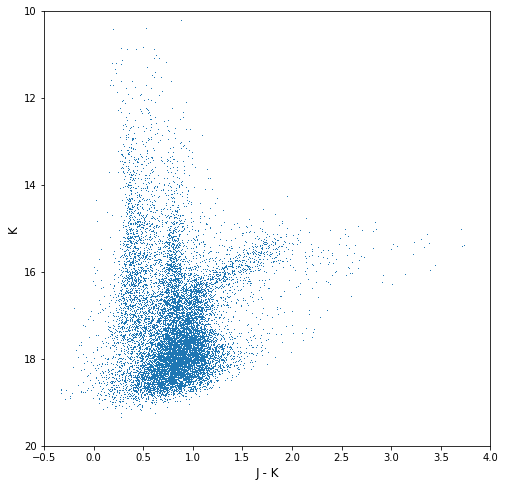

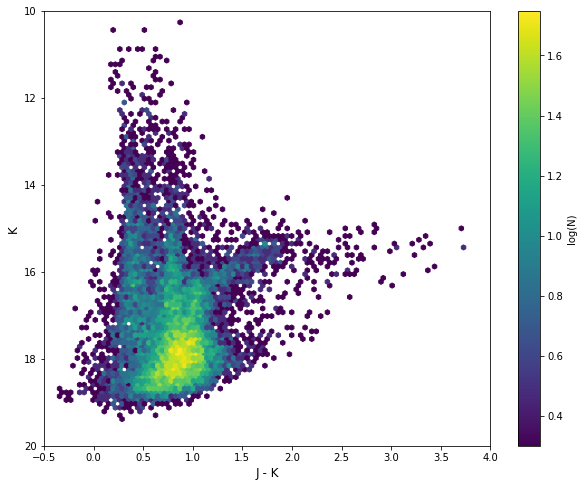

In [6]:
# 6

# K vs J-K
# CMD & Hess diagram
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#plt.savefig('K_vs_J-K_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
im1 = ax1.hexbin(phot_data.jMINUSk, phot_data.Kmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-0.5, 4.0, 20.0, 10.0))
ax1.set_xlabel('J - K', size=12)
ax1.set_ylabel('K', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('K_vs_J-K_hist.pdf')

In [7]:
# 7

# The second thing I'll do is make the first histogram, which uses all the data
# (no restriction in K-band), so it's basically one big lump.

/Users/ahirschauer/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


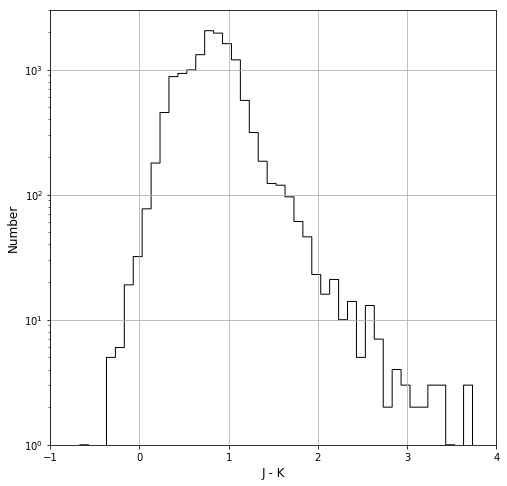

In [8]:
# 8

# J-K
# histogram
#
binwidth = 0.1
#binwidth = (stats.knuth_bin_width(phot_data.jMINUSk))#/100.
bin_number = (max(phot_data.jMINUSk)+binwidth)/binwidth
#
#print binwidth
#print bin_number
#
#binwidth = 0.1
#binwidth = (stats.knuth_bin_width(phot_data.Kmag))/100.
#bin_number2 = (max(phot_data.jMINUSk)+binwidth)/binwidth
#
#print binwidth
#print bin_number2
#
fig = plt.figure(figsize = (8,8))
plt.hist(phot_data.jMINUSk, bins=np.arange(min(phot_data.jMINUSk), max(phot_data.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-1.0, 4.0)
plt.ylim(0.0, 3000.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

In [9]:
# 9

# The third thing I'll do is make a different histogram with a restricted
# K-band range, to illustrate how isolating some data can help bring out
# the details of the CMD.
#
# For a start, I'll only plot K-values between 14.0 and 16.0.

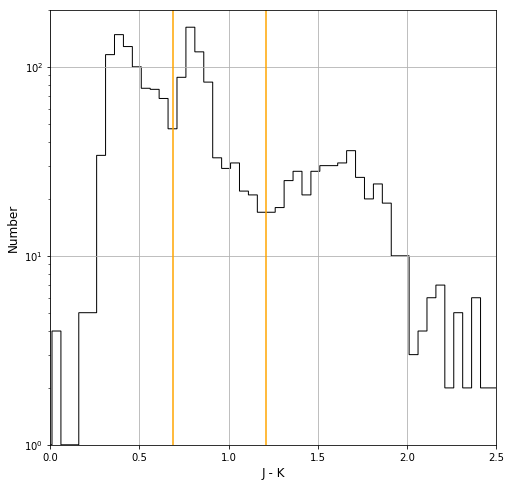

In [10]:
# 10

# J-K
# histogram (where phot_data.Kmag = 14.0 to 16.0)
#
# Plus with a narrower binwidth of 0.05.
#
jMINUSkHIST = phot_data[(phot_data.Kmag < 16.0) & (phot_data.Kmag > 14.0)]
#
#print jMINUSkHIST.Kmag
#print jMINUSkHIST.jMINUSk
#
binwidth = 0.05
bin_number = (max(jMINUSkHIST.jMINUSk)+binwidth)/binwidth
# print bin_number
# bw = stats.knuth_bin_width(star_cat[phot_data.Kmag])
# print bw
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST.jMINUSk, bins=np.arange(min(jMINUSkHIST.jMINUSk), max(jMINUSkHIST.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(0.0, 2.5)
plt.ylim(0.0, 200.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.axvline(x=0.69, linewidth=1.5, color='orange') # left inflection point *estimate*
plt.axvline(x=1.21, linewidth=1.5, color='orange') # right inflection point *estimate*
plt.grid(True)
plt.show()
plt.close()

In [11]:
# 11

# As you can see, the inflection points are at roughly
# J-K = 0.7 and J-K = 1.2.
#
# update (7 Nov 2018): set above as J-K = 0.69 and J-K = 1.21.
# I still haven't implemented Libby's binwidth command, though.
# (e-mailed Libby 9 Nov 2018)
#
# I'd like to implement some analysis tool that will figure out
# what that value is to more precision, but also, I'll next make
# progressive histograms which use a more restricted K-band range
# to see where these inflection points will be up the CMD.
#
# ^ Owen Boberg is going to help me out with that.
# update (12 Nov 2013): he did!

In [12]:
# 12

# Rather than estimate where the inflection points are over any
# given range of CMD y-values (in this case, K-band), I'm going to
# fit the histogram with a curve, then determine where the inflection
# points are, indicating the position of local minima.
#
# The following are a series of commands that Owen Boberg showed me
# to create the histogram fit curve.
#
# My intention is to recreate this curve for every y-value range bin
# to determine where the color-cut x-value is, then fit a line to these
# values in order to make a slanted color-cut for AGB star identification.

/Users/ahirschauer/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


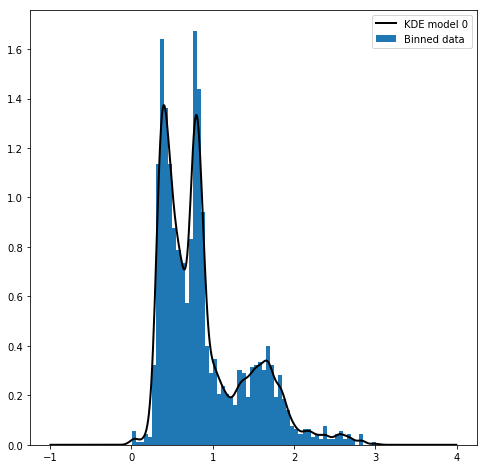

In [13]:
# 13

# Here's the conglomerated series of commands that Owen used to make a
# curve to fit the histogram(s).

kde_data = jMINUSkHIST.jMINUSk[(jMINUSkHIST.jMINUSk > -10000) & (jMINUSkHIST.jMINUSk < 3.0)].values

# ^ This defines the range of data to be used for the Kernel Density Estimation (KDE).
# "kde_data" will be appended with "_#" for successive y-value bin ranges.

bins=np.arange(min(kde_data ), max(kde_data ) + 0.05, 0.05)

# ^ This defines the bins over which the KDE will be plotted.

#kde = gaussian_kde(kde_data,bw_method=0.05)
#or kde = gaussian_kde(kde_data)

# ^ This defines the KDE as a Gaussian to be evaluated over the range of data defined earlier,
# with either binwidths of 0.05 (top) or calculated by the routine and not set manually.

#plt.hist(kde_data,normed=True,bins=bins)

# ^ This plots the KDE estimate for the histogram (linear, not log, which is important).
# In the first plot output, this is the blue histogram; the black line comes later.

x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)

# ^ This evaluates the x-values of the histogram(?), with the KDE minimum and KDE maximum
# as arguments, though I don't fully understand the trailing "500" (or the +/- 1.0s).

#plt.plot(x_eval, kde(x_eval), 'k-')

# ^ This plots the black line over the blue histogram in the first output plot.

#from scipy.optimize import curve_fit
#from scipy.optimize import leastsq

# ^ These call some fitting algorithms that we didn't end up using, so this could be skipped.

kde_0 = gaussian_kde(kde_data,bw_method=0.1)
# kde_0 = gaussian_kde(kde_data_0)

# ^ This defines a KDE as a Gaussian to be evaluated over the range of data defined earlier,
# with binwidths of 0.1, very similarly to the third command from the top.

#kde_0.scotts_factor()

# ^ This prints out the value of the KDE, which I think is effectively the binwidth.

plt.figure(figsize=(8,8))
plt.plot(x_eval, kde_0(x_eval),'k',lw=2,label='KDE model 0')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.legend()

# ^ This plots the fit to the second histogram, giving a looser value of the inflection
# points and therefore the local minima as compared to the first histogram, but by not
# following so many of the nooks and crannies, it might do a better job of characterizing
# where to set the color cuts, especially since this doesn't *need* to be too rigorous.
#
# I commented out everything for the first histogram, so I can just use what's left for
# the "mass production" of fit curves for each swathe.
#
# The next step would be to calculate the local minima somehow OR simply zoom in to where
# the minima are and estimate the J-K value to some precision (hundreth's place?).

In [14]:
# 14

# Here I'm going to re-plot the K vs J-K CMD with some overplotted
# boundary lines to help guide the eye.

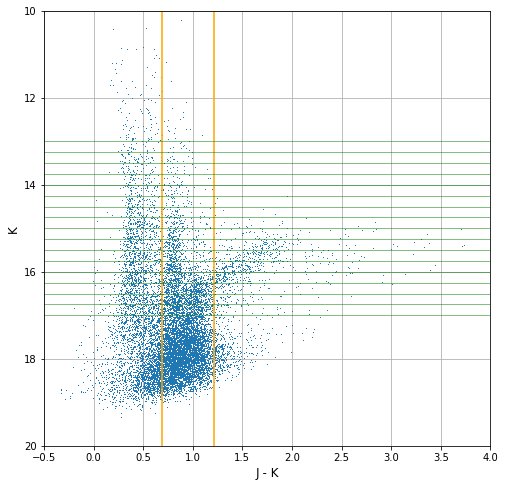

In [15]:
# 15

# K vs J-K
# CMD with boundary lines
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axvline(x=0.69, linewidth=1.5, color='orange') # left inflection point estimate
plt.axvline(x=1.21, linewidth=1.5, color='orange') # right inflection point estimate
#
plt.axhline(y=17.0, linewidth=0.5, color='green') # TRGB?
plt.axhline(y=16.75, linewidth=0.5, color='green') # TRGB?
plt.axhline(y=16.5, linewidth=0.5, color='green') # TRGB?
plt.axhline(y=16.25, linewidth=0.5, color='green') # TRGB?
plt.axhline(y=16.0, linewidth=0.5, color='green') # TRGB?
plt.axhline(y=15.75, linewidth=0.5, color='green') # TRGB?
plt.axhline(y=15.5, linewidth=0.5, color='green') # TRGB?
plt.axhline(y=15.25, linewidth=0.5, color='green') # TRGB?
plt.axhline(y=15.0, linewidth=0.5, color='green') # TRGB?
plt.axhline(y=14.75, linewidth=0.5, color='green') # TRGB?
plt.axhline(y=14.5, linewidth=0.5, color='green') # TRGB?
plt.axhline(y=14.25, linewidth=0.5, color='green') # TRGB?
plt.axhline(y=14.0, linewidth=0.5, color='green') # TRGB?
plt.axhline(y=13.75, linewidth=0.5, color='green') # TRGB?
plt.axhline(y=13.5, linewidth=0.5, color='green') # TRGB?
plt.axhline(y=13.25, linewidth=0.5, color='green') # TRGB?
plt.axhline(y=13.0, linewidth=0.5, color='green') # TRGB?
#
plt.grid(True)
plt.show()
plt.close()

In [16]:
# 16

# Based on the above CMD, histograms every 0.50 dex in K-magnitude
# space seem to be okay, though perhaps 0.25 dex or 0.10 dex would
# yield a finer mesh to compute the slanted boundaries with.
#
# update (11 Nov 2018): made 0.25 dix wide bins, which looks good.
#
# Also note that the orange vertical lines, which demonstrate where
# the vertical color cuts should be based on only the histgoram
# bounded from K = 14.0 to 16.0, doesn't do a great job.
#
# The left line separating out the O-rich AGB star candidates is
# a bit too far redward (to the right), as it seems to be encroaching
# on the spur of points at a median J-K value of around 0.8 or so.
#
# The right line separating out the C-rich AGB star candidates is
# clearly starting too far redward at the base of the diagonal spur,
# but then is clearly not redward enough at lower K-magnitudes
# (in other words, the bottom is too far right and it needs to slant
# more to the right as you go up the CMD).
#
# I will now construct histograms using small K-magnitude bins
# starting above the TRGB and going progressively up the CMD in order
# to figure out where the color-cut boundaries should be located.

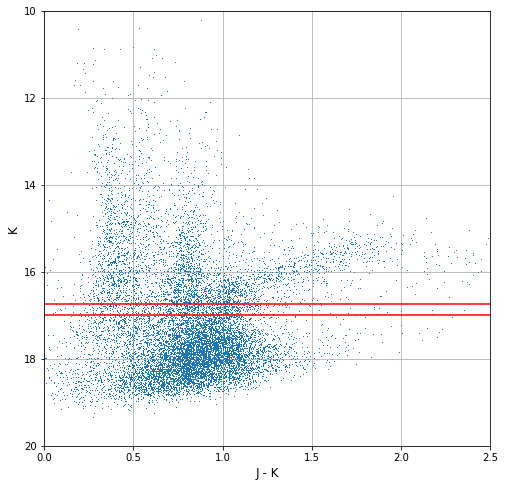

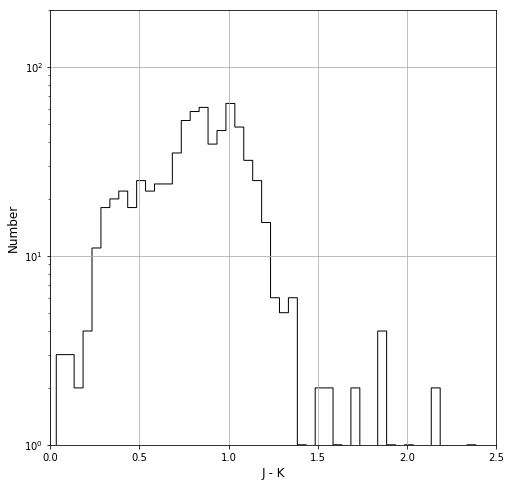

In [17]:
# 17

#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
#plt.xlim(-0.5, 4.0)
plt.xlim(0.0, 2.5)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=17.0, linewidth=1.5, color='red') # TRGB?
plt.axhline(y=16.75, linewidth=1.5, color='red') # TRGB?
#plt.axvline(x=0.0, linewidth=1.5, color='red') # left inflection point estimate
#plt.axvline(x=2.5, linewidth=1.5, color='red') # right inflection point estimate
#
plt.grid(True)
plt.show()
plt.close()

# J-K
# histogram (where phot_data.Kmag = 17.00 to 16.75)
#
# Plus with a narrower binwidth of 0.05.
#
jMINUSkHIST1 = phot_data[(phot_data.Kmag < 17.00) & (phot_data.Kmag > 16.75)]
#
#print jMINUSkHIST.Kmag
#print jMINUSkHIST.jMINUSk
#
binwidth = 0.05
#binwidth = stats.knuth_bin_width(phot_data.jMINUSk)/1000.
bin_number = (max(jMINUSkHIST1.jMINUSk)+binwidth)/binwidth
#print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST1.jMINUSk, bins=np.arange(min(jMINUSkHIST1.jMINUSk), max(jMINUSkHIST1.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
#plt.xlim(-0.5, 4.0)
plt.xlim(0.0, 2.5)
plt.ylim(0.0, 200.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

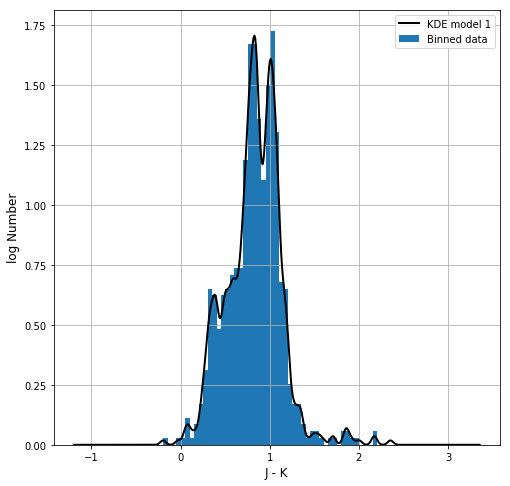

In [18]:
# 18

# Here's the conglomerated series of commands that Owen used to make a
# curve to fit the histogram(s).

kde_data_1 = jMINUSkHIST1.jMINUSk[(jMINUSkHIST1.jMINUSk > -10000) & (jMINUSkHIST1.jMINUSk < 3.0)].values

# ^ This defines the range of data to be used for the Kernel Density Estimation (KDE).
# "kde_data" will be appended with "_#" for successive y-value bin ranges.

bins=np.arange(min(kde_data_1 ), max(kde_data_1 ) + 0.05, 0.05)

# ^ This defines the bins over which the KDE will be plotted.

x_eval_1 = np.linspace(kde_data_1.min() - 1.0, kde_data_1.max() + 1.0, 500)

# ^ This evaluates the x-values of the histogram(?), with the KDE minimum and KDE maximum
# as arguments, though I don't fully understand the trailing "500" (or the +/- 1.0s).

kde_1 = gaussian_kde(kde_data_1,bw_method=0.1)
# kde_1 = gaussian_kde(kde_data_1)

# ^ This defines a KDE as a Gaussian to be evaluated over the range of data defined earlier,
# with binwidths of 0.1, very similarly to the third command from the top.

plt.figure(figsize=(8,8))
plt.plot(x_eval_1, kde_1(x_eval_1),'k',lw=2,label='KDE model 1')
plt.hist(kde_data_1,bins=bins,normed=True,label='Binned data')
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()

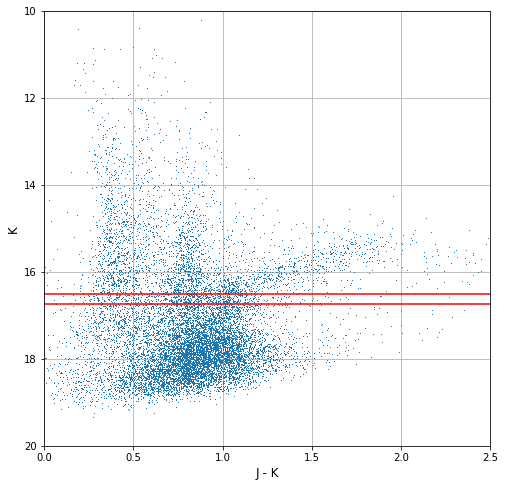

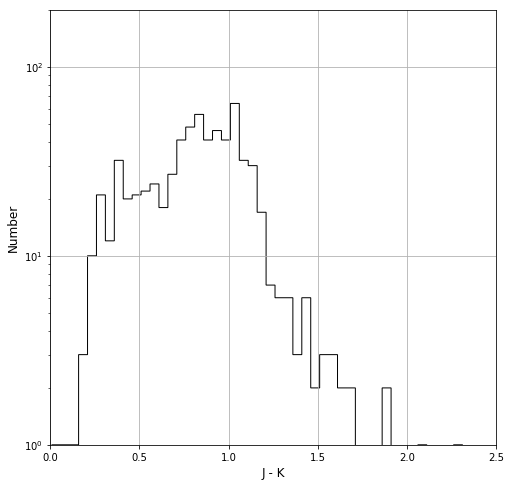

In [19]:
# 19

#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
#plt.xlim(-0.5, 4.0)
plt.xlim(0.0, 2.5)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=16.75, linewidth=1.5, color='red') # TRGB?
plt.axhline(y=16.5, linewidth=1.5, color='red') # TRGB?
#plt.axvline(x=0.0, linewidth=1.5, color='red') # left inflection point estimate
#plt.axvline(x=2.5, linewidth=1.5, color='red') # right inflection point estimate
#
plt.grid(True)
plt.show()
plt.close()

# J-K
# histogram (where phot_data.Kmag = 16.75 to 16.50)
#
# Plus with a narrower binwidth of 0.05.
#
jMINUSkHIST2 = phot_data[(phot_data.Kmag < 16.75) & (phot_data.Kmag > 16.50)]
#
#print jMINUSkHIST.Kmag
#print jMINUSkHIST.jMINUSk
#
binwidth = 0.05
bin_number = (max(jMINUSkHIST2.jMINUSk)+binwidth)/binwidth
# print bin_number
# bw = stats.knuth_bin_width(star_cat[phot_data.Kmag])
# print bw
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST2.jMINUSk, bins=np.arange(min(jMINUSkHIST2.jMINUSk), max(jMINUSkHIST2.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
#plt.xlim(-0.5, 4.0)
plt.xlim(0.0, 2.5)
plt.ylim(0.0, 200.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

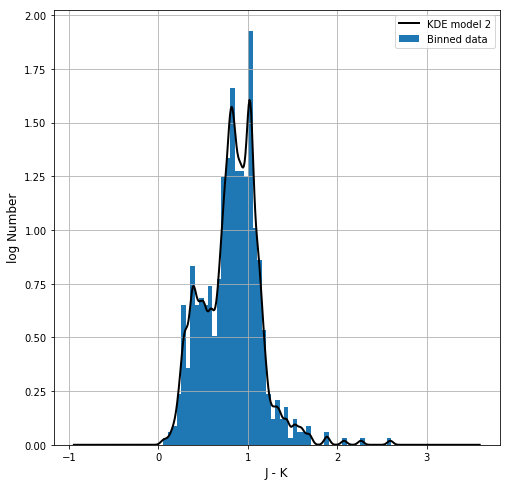

In [20]:
# 20

# Here's the conglomerated series of commands that Owen used to make a
# curve to fit the histogram(s).

kde_data_2 = jMINUSkHIST2.jMINUSk[(jMINUSkHIST2.jMINUSk > -10000) & (jMINUSkHIST2.jMINUSk < 3.0)].values

# ^ This defines the range of data to be used for the Kernel Density Estimation (KDE).
# "kde_data" will be appended with "_#" for successive y-value bin ranges.

bins=np.arange(min(kde_data_2 ), max(kde_data_2 ) + 0.05, 0.05)

# ^ This defines the bins over which the KDE will be plotted.

x_eval_2 = np.linspace(kde_data_2.min() - 1.0, kde_data_2.max() + 1.0, 500)

# ^ This evaluates the x-values of the histogram(?), with the KDE minimum and KDE maximum
# as arguments, though I don't fully understand the trailing "500" (or the +/- 1.0s).

kde_2 = gaussian_kde(kde_data_2,bw_method=0.1)
# kde_2 = gaussian_kde(kde_data_2)

# ^ This defines a KDE as a Gaussian to be evaluated over the range of data defined earlier,
# with binwidths of 0.1, very similarly to the third command from the top.

plt.figure(figsize=(8,8))
plt.plot(x_eval_2, kde_2(x_eval_2),'k',lw=2,label='KDE model 2')
plt.hist(kde_data_2,bins=bins,normed=True,label='Binned data')
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()

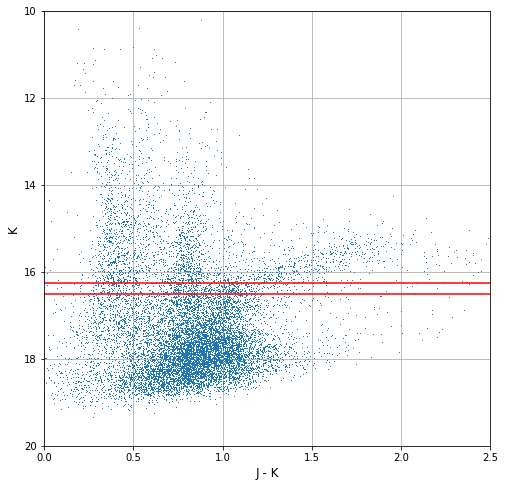

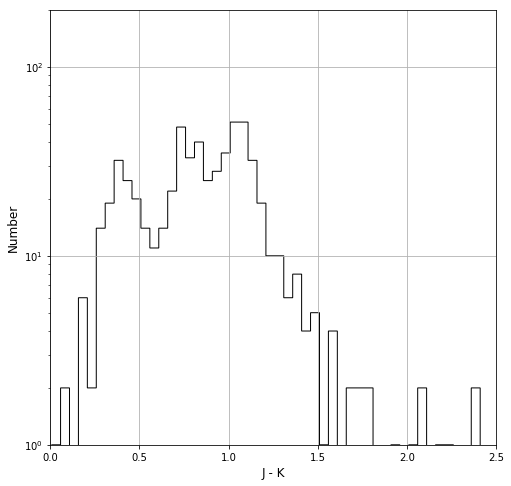

In [21]:
# 21

#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
#plt.xlim(-0.5, 4.0)
plt.xlim(0.0, 2.5)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=16.5, linewidth=1.5, color='red') # TRGB?
plt.axhline(y=16.25, linewidth=1.5, color='red') # TRGB?
#plt.axvline(x=0.0, linewidth=1.5, color='red') # left inflection point estimate
#plt.axvline(x=2.5, linewidth=1.5, color='red') # right inflection point estimate
#
plt.grid(True)
plt.show()
plt.close()

# J-K
# histogram (where phot_data.Kmag = 16.50 to 16.25)
#
# Plus with a narrower binwidth of 0.05.
#
jMINUSkHIST3 = phot_data[(phot_data.Kmag < 16.50) & (phot_data.Kmag > 16.25)]
#
#print jMINUSkHIST.Kmag
#print jMINUSkHIST.jMINUSk
#
binwidth = 0.05
bin_number = (max(jMINUSkHIST3.jMINUSk)+binwidth)/binwidth
# print bin_number
# bw = stats.knuth_bin_width(star_cat[phot_data.Kmag])
# print bw
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST3.jMINUSk, bins=np.arange(min(jMINUSkHIST3.jMINUSk), max(jMINUSkHIST3.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
#plt.xlim(-0.5, 4.0)
plt.xlim(0.0, 2.5)
plt.ylim(0.0, 200.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

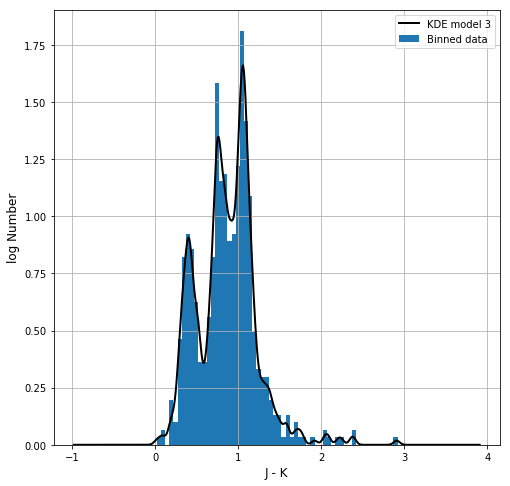

In [22]:
# 22

# Here's the conglomerated series of commands that Owen used to make a
# curve to fit the histogram(s).

kde_data_3 = jMINUSkHIST3.jMINUSk[(jMINUSkHIST3.jMINUSk > -10000) & (jMINUSkHIST3.jMINUSk < 3.0)].values

# ^ This defines the range of data to be used for the Kernel Density Estimation (KDE).
# "kde_data" will be appended with "_#" for successive y-value bin ranges.

bins=np.arange(min(kde_data_3 ), max(kde_data_3 ) + 0.05, 0.05)

# ^ This defines the bins over which the KDE will be plotted.

x_eval_3 = np.linspace(kde_data_3.min() - 1.0, kde_data_3.max() + 1.0, 500)

# ^ This evaluates the x-values of the histogram(?), with the KDE minimum and KDE maximum
# as arguments, though I don't fully understand the trailing "500" (or the +/- 1.0s).

kde_3 = gaussian_kde(kde_data_3,bw_method=0.1)
# kde_3 = gaussian_kde(kde_data_3)

# ^ This defines a KDE as a Gaussian to be evaluated over the range of data defined earlier,
# with binwidths of 0.1, very similarly to the third command from the top.

plt.figure(figsize=(8,8))
plt.plot(x_eval_3, kde_3(x_eval_3),'k',lw=2,label='KDE model 3')
plt.hist(kde_data_3,bins=bins,normed=True,label='Binned data')
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()

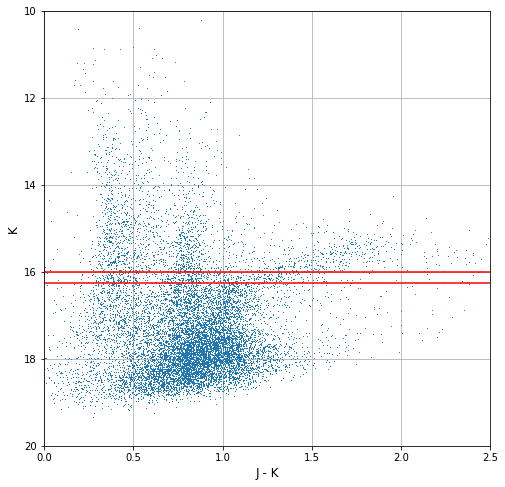

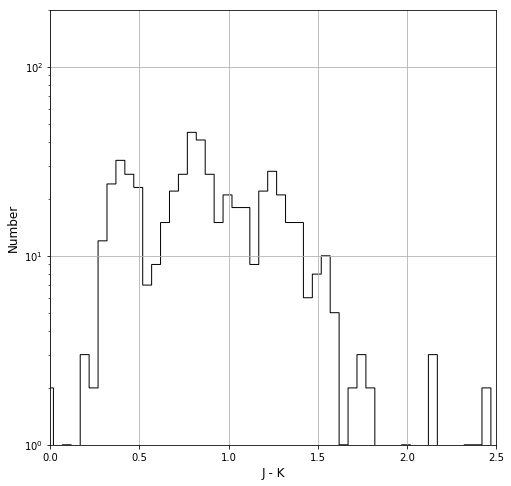

In [23]:
# 23

#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
#plt.xlim(-0.5, 4.0)
plt.xlim(0.0, 2.5)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=16.25, linewidth=1.5, color='red') # TRGB?
plt.axhline(y=16.0, linewidth=1.5, color='red') # TRGB?
#plt.axvline(x=0.0, linewidth=1.5, color='red') # left inflection point estimate
#plt.axvline(x=2.5, linewidth=1.5, color='red') # right inflection point estimate
#
plt.grid(True)
plt.show()
plt.close()

# J-K
# histogram (where phot_data.Kmag = 16.25 to 16.00)
#
# Plus with a narrower binwidth of 0.05.
#
jMINUSkHIST4 = phot_data[(phot_data.Kmag < 16.25) & (phot_data.Kmag > 16.00)]
#
#print jMINUSkHIST.Kmag
#print jMINUSkHIST.jMINUSk
#
binwidth = 0.05
bin_number = (max(jMINUSkHIST4.jMINUSk)+binwidth)/binwidth
# print bin_number
# bw = stats.knuth_bin_width(star_cat[phot_data.Kmag])
# print bw
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST4.jMINUSk, bins=np.arange(min(jMINUSkHIST4.jMINUSk), max(jMINUSkHIST4.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
#plt.xlim(-0.5, 4.0)
plt.xlim(0.0, 2.5)
plt.ylim(0.0, 200.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

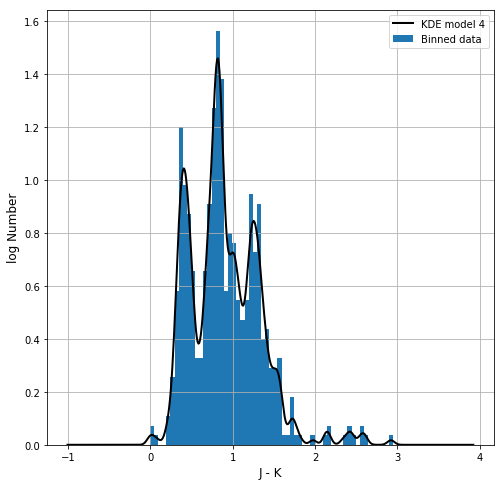

In [24]:
# 24

# Here's the conglomerated series of commands that Owen used to make a
# curve to fit the histogram(s).

kde_data_4 = jMINUSkHIST4.jMINUSk[(jMINUSkHIST4.jMINUSk > -10000) & (jMINUSkHIST4.jMINUSk < 3.0)].values

# ^ This defines the range of data to be used for the Kernel Density Estimation (KDE).
# "kde_data" will be appended with "_#" for successive y-value bin ranges.

bins=np.arange(min(kde_data_4 ), max(kde_data_4 ) + 0.05, 0.05)

# ^ This defines the bins over which the KDE will be plotted.

x_eval_4 = np.linspace(kde_data_4.min() - 1.0, kde_data_4.max() + 1.0, 500)

# ^ This evaluates the x-values of the histogram(?), with the KDE minimum and KDE maximum
# as arguments, though I don't fully understand the trailing "500" (or the +/- 1.0s).

kde_4 = gaussian_kde(kde_data_4,bw_method=0.1)
# kde_4 = gaussian_kde(kde_data_4)

# ^ This defines a KDE as a Gaussian to be evaluated over the range of data defined earlier,
# with binwidths of 0.1, very similarly to the third command from the top.

plt.figure(figsize=(8,8))
plt.plot(x_eval_4, kde_4(x_eval_4),'k',lw=2,label='KDE model 4')
plt.hist(kde_data_4,bins=bins,normed=True,label='Binned data')
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()

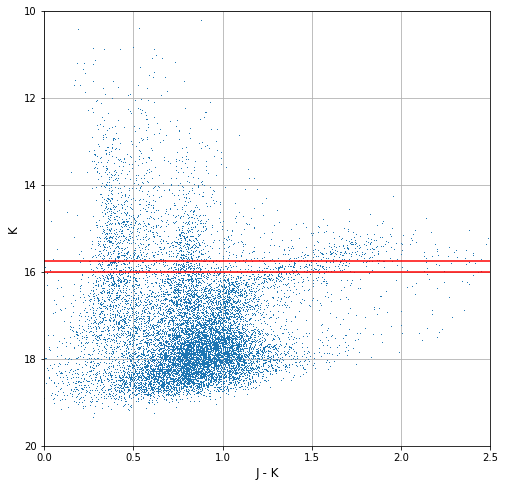

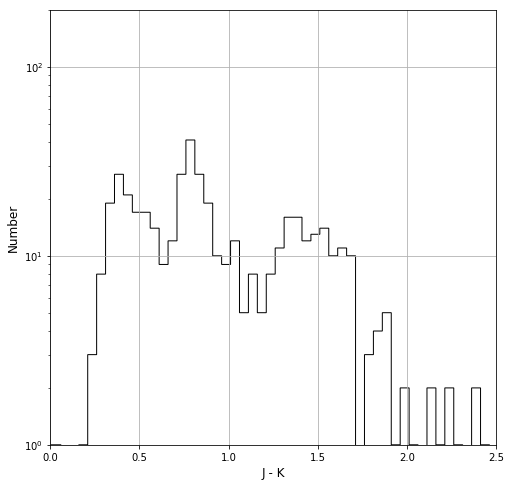

In [25]:
# 25

#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
#plt.xlim(-0.5, 4.0)
plt.xlim(0.0, 2.5)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=16.0, linewidth=1.5, color='red') # TRGB?
plt.axhline(y=15.75, linewidth=1.5, color='red') # TRGB?
#plt.axvline(x=0.0, linewidth=1.5, color='red') # left inflection point estimate
#plt.axvline(x=2.5, linewidth=1.5, color='red') # right inflection point estimate
#
plt.grid(True)
plt.show()
plt.close()

# J-K
# histogram (where phot_data.Kmag = 16.00 to 15.75)
#
# Plus with a narrower binwidth of 0.05.
#
jMINUSkHIST5 = phot_data[(phot_data.Kmag < 16.00) & (phot_data.Kmag > 15.75)]
#
#print jMINUSkHIST.Kmag
#print jMINUSkHIST.jMINUSk
#
binwidth = 0.05
bin_number = (max(jMINUSkHIST5.jMINUSk)+binwidth)/binwidth
# print bin_number
# bw = stats.knuth_bin_width(star_cat[phot_data.Kmag])
# print bw
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST5.jMINUSk, bins=np.arange(min(jMINUSkHIST5.jMINUSk), max(jMINUSkHIST5.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
#plt.xlim(-0.5, 4.0)
plt.xlim(0.0, 2.5)
plt.ylim(0.0, 200.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

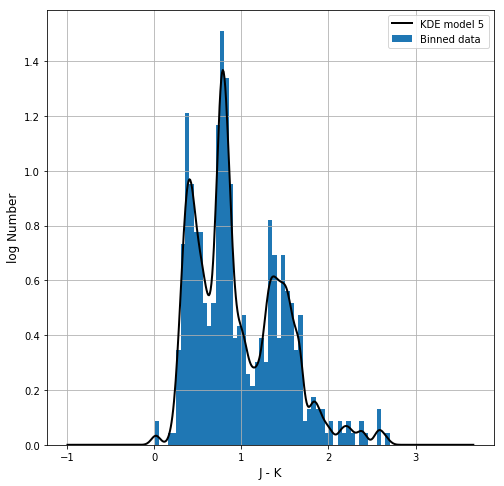

In [26]:
# 26

# Here's the conglomerated series of commands that Owen used to make a
# curve to fit the histogram(s).

kde_data_5 = jMINUSkHIST5.jMINUSk[(jMINUSkHIST5.jMINUSk > -10000) & (jMINUSkHIST5.jMINUSk < 3.0)].values

# ^ This defines the range of data to be used for the Kernel Density Estimation (KDE).
# "kde_data" will be appended with "_#" for successive y-value bin ranges.

bins=np.arange(min(kde_data_5 ), max(kde_data_5 ) + 0.05, 0.05)

# ^ This defines the bins over which the KDE will be plotted.

x_eval_5 = np.linspace(kde_data_5.min() - 1.0, kde_data_5.max() + 1.0, 500)

# ^ This evaluates the x-values of the histogram(?), with the KDE minimum and KDE maximum
# as arguments, though I don't fully understand the trailing "500" (or the +/- 1.0s).

kde_5 = gaussian_kde(kde_data_5,bw_method=0.1)
# kde_5 = gaussian_kde(kde_data_5)

# ^ This defines a KDE as a Gaussian to be evaluated over the range of data defined earlier,
# with binwidths of 0.1, very similarly to the third command from the top.

plt.figure(figsize=(8,8))
plt.plot(x_eval_5, kde_5(x_eval_5),'k',lw=2,label='KDE model 5')
plt.hist(kde_data_5,bins=bins,normed=True,label='Binned data')
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()

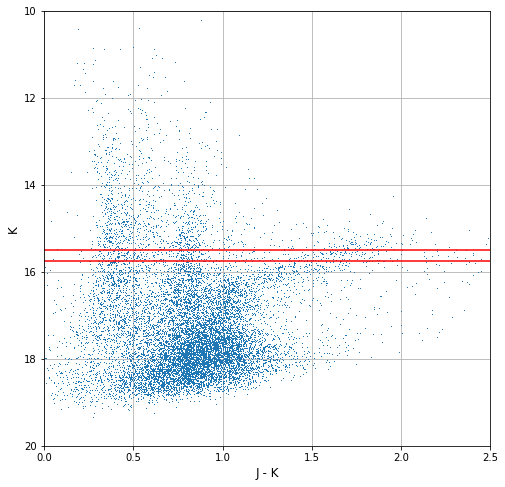

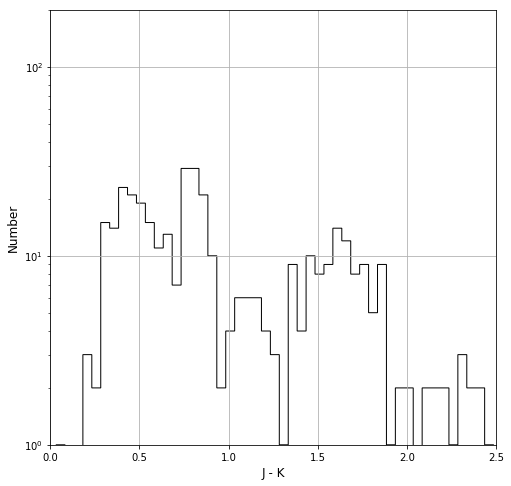

In [27]:
# 27

#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
#plt.xlim(-0.5, 4.0)
plt.xlim(0.0, 2.5)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=15.75, linewidth=1.5, color='red') # TRGB?
plt.axhline(y=15.5, linewidth=1.5, color='red') # TRGB?
#plt.axvline(x=0.0, linewidth=1.5, color='red') # left inflection point estimate
#plt.axvline(x=2.5, linewidth=1.5, color='red') # right inflection point estimate
#
plt.grid(True)
plt.show()
plt.close()

# J-K
# histogram (where phot_data.Kmag = 15.75 to 15.50)
#
# Plus with a narrower binwidth of 0.05.
#
jMINUSkHIST6 = phot_data[(phot_data.Kmag < 15.75) & (phot_data.Kmag > 15.50)]
#
#print jMINUSkHIST.Kmag
#print jMINUSkHIST.jMINUSk
#
binwidth = 0.05
bin_number = (max(jMINUSkHIST6.jMINUSk)+binwidth)/binwidth
# print bin_number
# bw = stats.knuth_bin_width(star_cat[phot_data.Kmag])
# print bw
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST6.jMINUSk, bins=np.arange(min(jMINUSkHIST6.jMINUSk), max(jMINUSkHIST6.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
#plt.xlim(-0.5, 4.0)
plt.xlim(0.0, 2.5)
plt.ylim(0.0, 200.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

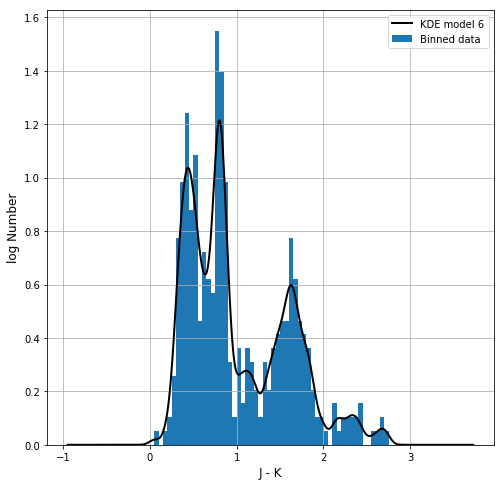

In [28]:
# 28

# Here's the conglomerated series of commands that Owen used to make a
# curve to fit the histogram(s).

kde_data_6 = jMINUSkHIST6.jMINUSk[(jMINUSkHIST6.jMINUSk > -10000) & (jMINUSkHIST6.jMINUSk < 3.0)].values

# ^ This defines the range of data to be used for the Kernel Density Estimation (KDE).
# "kde_data" will be appended with "_#" for successive y-value bin ranges.

bins=np.arange(min(kde_data_6 ), max(kde_data_6 ) + 0.05, 0.05)

# ^ This defines the bins over which the KDE will be plotted.

x_eval_6 = np.linspace(kde_data_6.min() - 1.0, kde_data_6.max() + 1.0, 500)

# ^ This evaluates the x-values of the histogram(?), with the KDE minimum and KDE maximum
# as arguments, though I don't fully understand the trailing "500" (or the +/- 1.0s).

kde_6 = gaussian_kde(kde_data_6,bw_method=0.1)
# kde_6 = gaussian_kde(kde_data_6)

# ^ This defines a KDE as a Gaussian to be evaluated over the range of data defined earlier,
# with binwidths of 0.1, very similarly to the third command from the top.

plt.figure(figsize=(8,8))
plt.plot(x_eval_6, kde_6(x_eval_6),'k',lw=2,label='KDE model 6')
plt.hist(kde_data_6,bins=bins,normed=True,label='Binned data')
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()

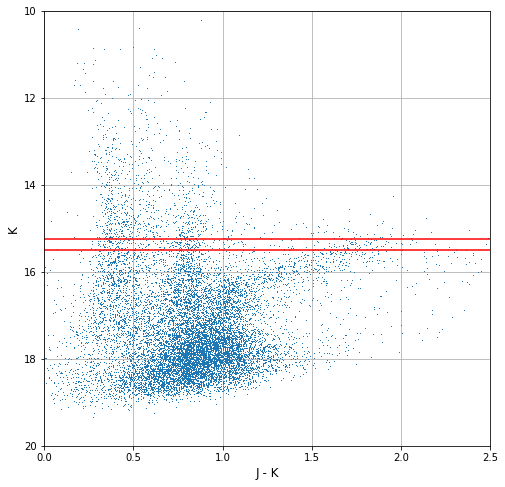

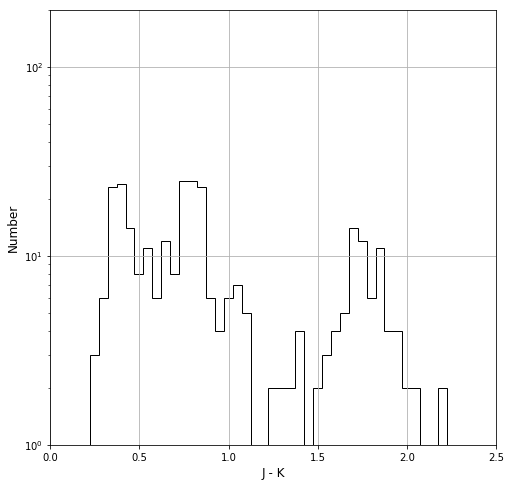

In [29]:
# 29

#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
#plt.xlim(-0.5, 4.0)
plt.xlim(0.0, 2.5)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=15.5, linewidth=1.5, color='red') # TRGB?
plt.axhline(y=15.25, linewidth=1.5, color='red') # TRGB?
#plt.axvline(x=0.0, linewidth=1.5, color='red') # left inflection point estimate
#plt.axvline(x=2.5, linewidth=1.5, color='red') # right inflection point estimate
#
plt.grid(True)
plt.show()
plt.close()

# J-K
# histogram (where phot_data.Kmag = 15.50 to 15.25)
#
# Plus with a narrower binwidth of 0.05.
#
jMINUSkHIST7 = phot_data[(phot_data.Kmag < 15.50) & (phot_data.Kmag > 15.25)]
#
#print jMINUSkHIST.Kmag
#print jMINUSkHIST.jMINUSk
#
binwidth = 0.05
bin_number = (max(jMINUSkHIST7.jMINUSk)+binwidth)/binwidth
# print bin_number
# bw = stats.knuth_bin_width(star_cat[phot_data.Kmag])
# print bw
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST7.jMINUSk, bins=np.arange(min(jMINUSkHIST7.jMINUSk), max(jMINUSkHIST7.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
#plt.xlim(-0.5, 4.0)
plt.xlim(0.0, 2.5)
plt.ylim(0.0, 200.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

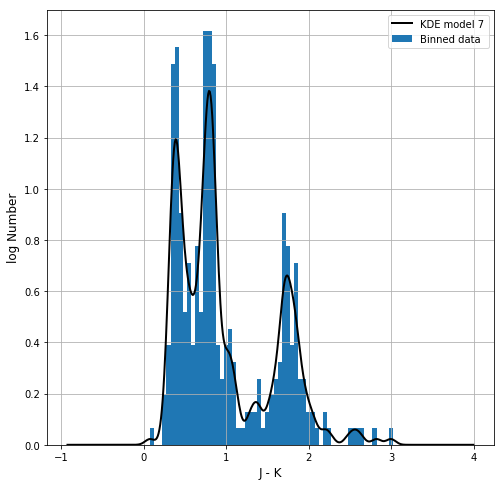

In [30]:
# 30

# Here's the conglomerated series of commands that Owen used to make a
# curve to fit the histogram(s).

kde_data_7 = jMINUSkHIST7.jMINUSk[(jMINUSkHIST7.jMINUSk > -10000) & (jMINUSkHIST7.jMINUSk < 3.0)].values

# ^ This defines the range of data to be used for the Kernel Density Estimation (KDE).
# "kde_data" will be appended with "_#" for successive y-value bin ranges.

bins=np.arange(min(kde_data_7 ), max(kde_data_7 ) + 0.05, 0.05)

# ^ This defines the bins over which the KDE will be plotted.

x_eval_7 = np.linspace(kde_data_7.min() - 1.0, kde_data_7.max() + 1.0, 500)

# ^ This evaluates the x-values of the histogram(?), with the KDE minimum and KDE maximum
# as arguments, though I don't fully understand the trailing "500" (or the +/- 1.0s).

kde_7 = gaussian_kde(kde_data_7,bw_method=0.1)
# kde_7 = gaussian_kde(kde_data_7)

# ^ This defines a KDE as a Gaussian to be evaluated over the range of data defined earlier,
# with binwidths of 0.1, very similarly to the third command from the top.

plt.figure(figsize=(8,8))
plt.plot(x_eval_7, kde_7(x_eval_7),'k',lw=2,label='KDE model 7')
plt.hist(kde_data_7,bins=bins,normed=True,label='Binned data')
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()

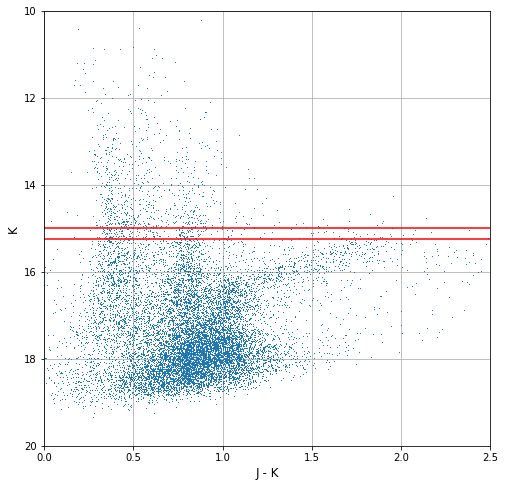

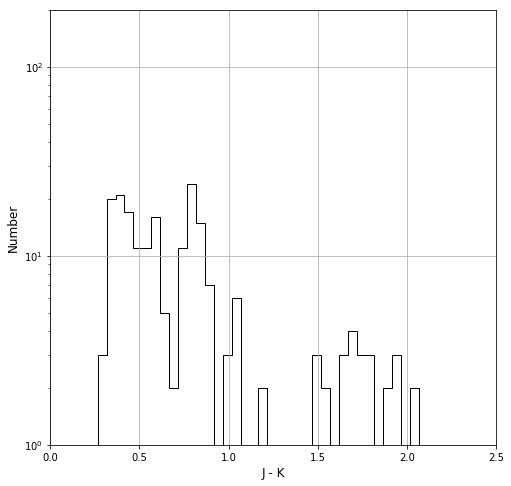

In [31]:
# 31

#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
#plt.xlim(-0.5, 4.0)
plt.xlim(0.0, 2.5)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=15.25, linewidth=1.5, color='red') # TRGB?
plt.axhline(y=15.0, linewidth=1.5, color='red') # TRGB?
#plt.axvline(x=0.0, linewidth=1.5, color='red') # left inflection point estimate
#plt.axvline(x=2.5, linewidth=1.5, color='red') # right inflection point estimate
#
plt.grid(True)
plt.show()
plt.close()

# J-K
# histogram (where phot_data.Kmag = 15.25 to 15.00)
#
# Plus with a narrower binwidth of 0.05.
#
jMINUSkHIST8 = phot_data[(phot_data.Kmag < 15.25) & (phot_data.Kmag > 15.00)]
#
#print jMINUSkHIST.Kmag
#print jMINUSkHIST.jMINUSk
#
binwidth = 0.05
bin_number = (max(jMINUSkHIST8.jMINUSk)+binwidth)/binwidth
# print bin_number
# bw = stats.knuth_bin_width(star_cat[phot_data.Kmag])
# print bw
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST8.jMINUSk, bins=np.arange(min(jMINUSkHIST8.jMINUSk), max(jMINUSkHIST8.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
#plt.xlim(-0.5, 4.0)
plt.xlim(0.0, 2.5)
plt.ylim(0.0, 200.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

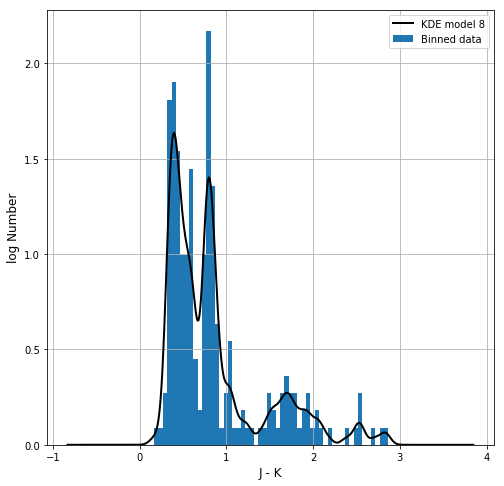

In [32]:
# 32

# Here's the conglomerated series of commands that Owen used to make a
# curve to fit the histogram(s).

kde_data_8 = jMINUSkHIST8.jMINUSk[(jMINUSkHIST8.jMINUSk > -10000) & (jMINUSkHIST8.jMINUSk < 3.0)].values

# ^ This defines the range of data to be used for the Kernel Density Estimation (KDE).
# "kde_data" will be appended with "_#" for successive y-value bin ranges.

bins=np.arange(min(kde_data_8 ), max(kde_data_8 ) + 0.05, 0.05)

# ^ This defines the bins over which the KDE will be plotted.

x_eval_8 = np.linspace(kde_data_8.min() - 1.0, kde_data_8.max() + 1.0, 500)

# ^ This evaluates the x-values of the histogram(?), with the KDE minimum and KDE maximum
# as arguments, though I don't fully understand the trailing "500" (or the +/- 1.0s).

kde_8 = gaussian_kde(kde_data_8,bw_method=0.1)
# kde_8 = gaussian_kde(kde_data_8)

# ^ This defines a KDE as a Gaussian to be evaluated over the range of data defined earlier,
# with binwidths of 0.1, very similarly to the third command from the top.

plt.figure(figsize=(8,8))
plt.plot(x_eval_8, kde_8(x_eval_8),'k',lw=2,label='KDE model 8')
plt.hist(kde_data_8,bins=bins,normed=True,label='Binned data')
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()

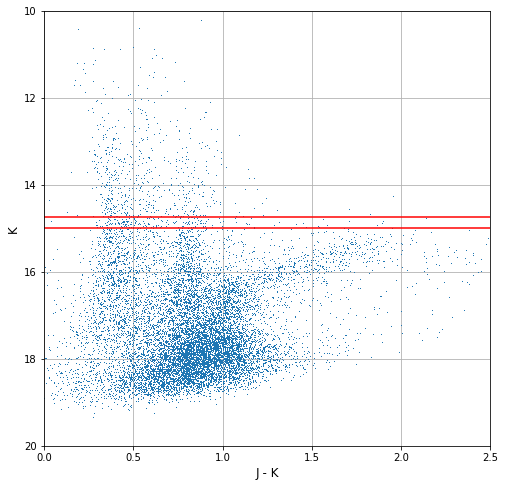

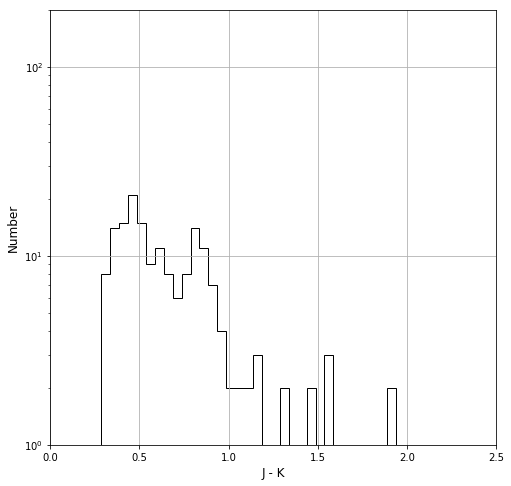

In [33]:
# 33

#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
#plt.xlim(-0.5, 4.0)
plt.xlim(0.0, 2.5)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=15.0, linewidth=1.5, color='red') # TRGB?
plt.axhline(y=14.75, linewidth=1.5, color='red') # TRGB?
#plt.axvline(x=0.0, linewidth=1.5, color='red') # left inflection point estimate
#plt.axvline(x=2.5, linewidth=1.5, color='red') # right inflection point estimate
#
plt.grid(True)
plt.show()
plt.close()

# J-K
# histogram (where phot_data.Kmag = 15.00 to 14.75)
#
# Plus with a narrower binwidth of 0.05.
#
jMINUSkHIST9 = phot_data[(phot_data.Kmag < 15.00) & (phot_data.Kmag > 14.75)]
#
#print jMINUSkHIST.Kmag
#print jMINUSkHIST.jMINUSk
#
binwidth = 0.05
bin_number = (max(jMINUSkHIST9.jMINUSk)+binwidth)/binwidth
# print bin_number
# bw = stats.knuth_bin_width(star_cat[phot_data.Kmag])
# print bw
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST9.jMINUSk, bins=np.arange(min(jMINUSkHIST9.jMINUSk), max(jMINUSkHIST9.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
#plt.xlim(-0.5, 4.0)
plt.xlim(0.0, 2.5)
plt.ylim(0.0, 200.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

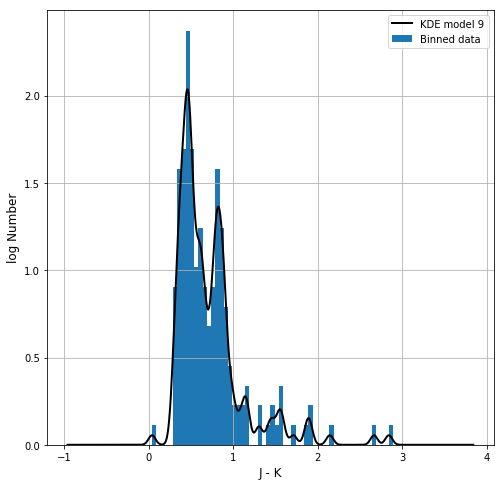

In [34]:
# 34

# Here's the conglomerated series of commands that Owen used to make a
# curve to fit the histogram(s).

kde_data_9 = jMINUSkHIST9.jMINUSk[(jMINUSkHIST9.jMINUSk > -10000) & (jMINUSkHIST9.jMINUSk < 3.0)].values

# ^ This defines the range of data to be used for the Kernel Density Estimation (KDE).
# "kde_data" will be appended with "_#" for successive y-value bin ranges.

bins=np.arange(min(kde_data_9 ), max(kde_data_9 ) + 0.05, 0.05)

# ^ This defines the bins over which the KDE will be plotted.

x_eval_9 = np.linspace(kde_data_9.min() - 1.0, kde_data_9.max() + 1.0, 500)

# ^ This evaluates the x-values of the histogram(?), with the KDE minimum and KDE maximum
# as arguments, though I don't fully understand the trailing "500" (or the +/- 1.0s).

kde_9 = gaussian_kde(kde_data_9,bw_method=0.1)
# kde_9 = gaussian_kde(kde_data_9)

# ^ This defines a KDE as a Gaussian to be evaluated over the range of data defined earlier,
# with binwidths of 0.1, very similarly to the third command from the top.

plt.figure(figsize=(8,8))
plt.plot(x_eval_9, kde_9(x_eval_9),'k',lw=2,label='KDE model 9')
plt.hist(kde_data_9,bins=bins,normed=True,label='Binned data')
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()

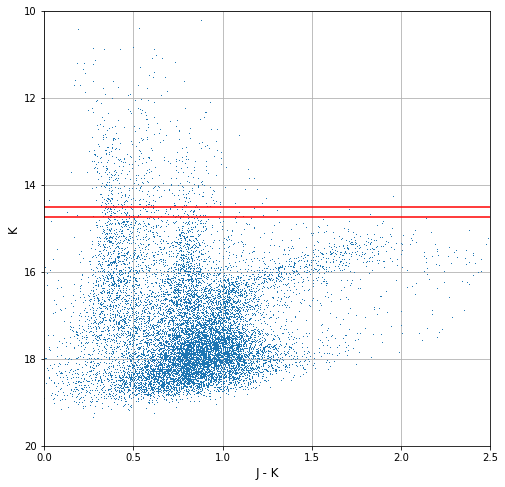

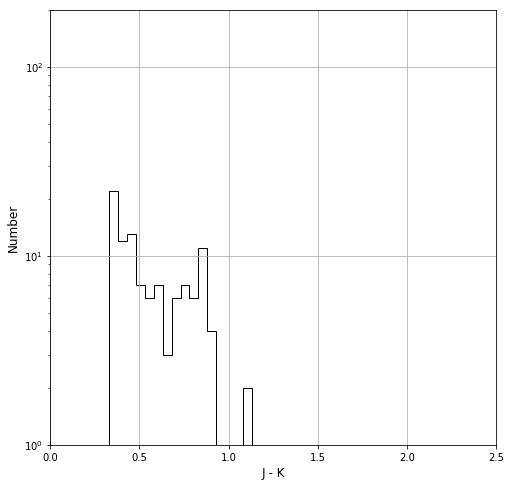

In [35]:
# 35

#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
#plt.xlim(-0.5, 4.0)
plt.xlim(0.0, 2.5)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=14.75, linewidth=1.5, color='red') # TRGB?
plt.axhline(y=14.5, linewidth=1.5, color='red') # TRGB?
#plt.axvline(x=0.0, linewidth=1.5, color='red') # left inflection point estimate
#plt.axvline(x=2.5, linewidth=1.5, color='red') # right inflection point estimate
#
plt.grid(True)
plt.show()
plt.close()

# J-K
# histogram (where phot_data.Kmag = 14.75 to 14.50)
#
# Plus with a narrower binwidth of 0.05.
#
jMINUSkHIST10 = phot_data[(phot_data.Kmag < 14.75) & (phot_data.Kmag > 14.50)]
#
#print jMINUSkHIST.Kmag
#print jMINUSkHIST.jMINUSk
#
binwidth = 0.05
bin_number = (max(jMINUSkHIST10.jMINUSk)+binwidth)/binwidth
# print bin_number
# bw = stats.knuth_bin_width(star_cat[phot_data.Kmag])
# print bw
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST10.jMINUSk, bins=np.arange(min(jMINUSkHIST10.jMINUSk), max(jMINUSkHIST10.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
#plt.xlim(-0.5, 4.0)
plt.xlim(0.0, 2.5)
plt.ylim(0.0, 200.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

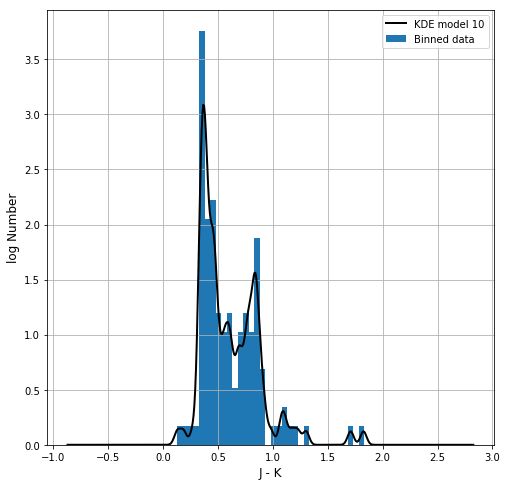

In [36]:
# 36

# Here's the conglomerated series of commands that Owen used to make a
# curve to fit the histogram(s).

kde_data_10 = jMINUSkHIST10.jMINUSk[(jMINUSkHIST10.jMINUSk > -10000) & (jMINUSkHIST10.jMINUSk < 3.0)].values

# ^ This defines the range of data to be used for the Kernel Density Estimation (KDE).
# "kde_data" will be appended with "_#" for successive y-value bin ranges.

bins=np.arange(min(kde_data_10 ), max(kde_data_10 ) + 0.05, 0.05)

# ^ This defines the bins over which the KDE will be plotted.

x_eval_10 = np.linspace(kde_data_10.min() - 1.0, kde_data_10.max() + 1.0, 500)

# ^ This evaluates the x-values of the histogram(?), with the KDE minimum and KDE maximum
# as arguments, though I don't fully understand the trailing "500" (or the +/- 1.0s).

kde_10 = gaussian_kde(kde_data_10,bw_method=0.1)
# kde_10 = gaussian_kde(kde_data_10)

# ^ This defines a KDE as a Gaussian to be evaluated over the range of data defined earlier,
# with binwidths of 0.1, very similarly to the third command from the top.

plt.figure(figsize=(8,8))
plt.plot(x_eval_10, kde_10(x_eval_10),'k',lw=2,label='KDE model 10')
plt.hist(kde_data_10,bins=bins,normed=True,label='Binned data')
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()

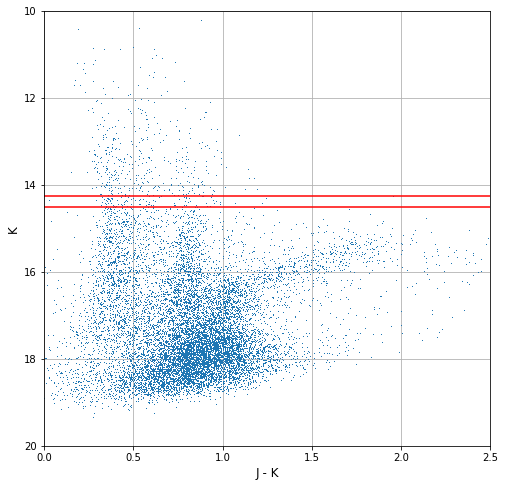

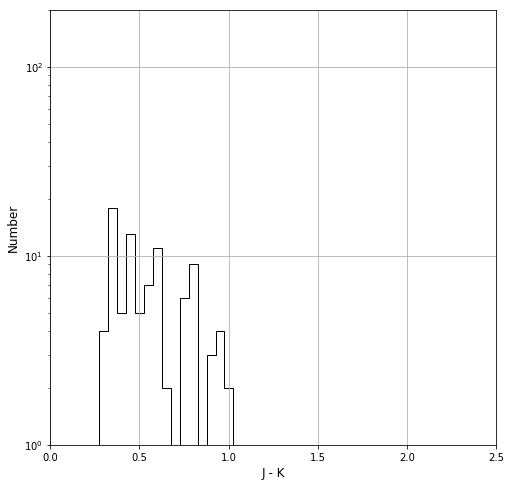

In [37]:
# 37

#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
#plt.xlim(-0.5, 4.0)
plt.xlim(0.0, 2.5)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=14.5, linewidth=1.5, color='red') # TRGB?
plt.axhline(y=14.25, linewidth=1.5, color='red') # TRGB?
#plt.axvline(x=0.0, linewidth=1.5, color='red') # left inflection point estimate
#plt.axvline(x=2.5, linewidth=1.5, color='red') # right inflection point estimate
#
plt.grid(True)
plt.show()
plt.close()

# J-K
# histogram (where phot_data.Kmag = 14.50 to 14.25)
#
# Plus with a narrower binwidth of 0.05.
#
jMINUSkHIST11 = phot_data[(phot_data.Kmag < 14.50) & (phot_data.Kmag > 14.25)]
#
#print jMINUSkHIST.Kmag
#print jMINUSkHIST.jMINUSk
#
binwidth = 0.05
bin_number = (max(jMINUSkHIST11.jMINUSk)+binwidth)/binwidth
# print bin_number
# bw = stats.knuth_bin_width(star_cat[phot_data.Kmag])
# print bw
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST11.jMINUSk, bins=np.arange(min(jMINUSkHIST11.jMINUSk), max(jMINUSkHIST11.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
#plt.xlim(-0.5, 4.0)
plt.xlim(0.0, 2.5)
plt.ylim(0.0, 200.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

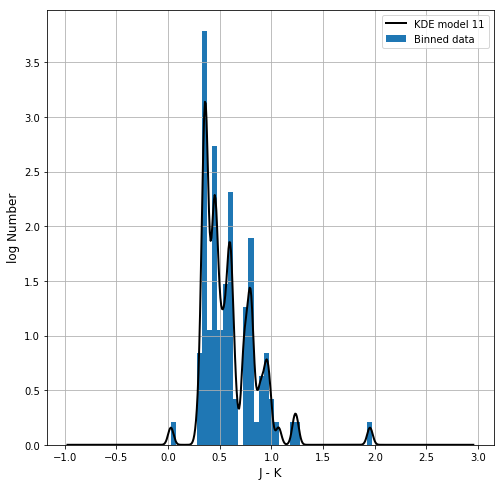

In [38]:
# 38

# Here's the conglomerated series of commands that Owen used to make a
# curve to fit the histogram(s).

kde_data_11 = jMINUSkHIST11.jMINUSk[(jMINUSkHIST11.jMINUSk > -10000) & (jMINUSkHIST11.jMINUSk < 3.0)].values

# ^ This defines the range of data to be used for the Kernel Density Estimation (KDE).
# "kde_data" will be appended with "_#" for successive y-value bin ranges.

bins=np.arange(min(kde_data_11 ), max(kde_data_11 ) + 0.05, 0.05)

# ^ This defines the bins over which the KDE will be plotted.

x_eval_11 = np.linspace(kde_data_11.min() - 1.0, kde_data_11.max() + 1.0, 500)

# ^ This evaluates the x-values of the histogram(?), with the KDE minimum and KDE maximum
# as arguments, though I don't fully understand the trailing "500" (or the +/- 1.0s).

kde_11 = gaussian_kde(kde_data_11,bw_method=0.1)
# kde_11 = gaussian_kde(kde_data_11)

# ^ This defines a KDE as a Gaussian to be evaluated over the range of data defined earlier,
# with binwidths of 0.1, very similarly to the third command from the top.

plt.figure(figsize=(8,8))
plt.plot(x_eval_11, kde_11(x_eval_11),'k',lw=2,label='KDE model 11')
plt.hist(kde_data_11,bins=bins,normed=True,label='Binned data')
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()

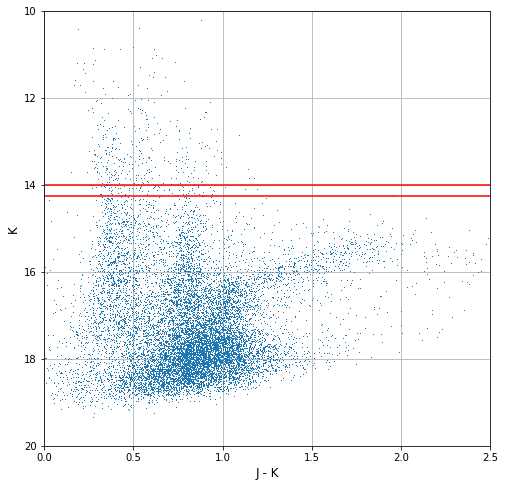

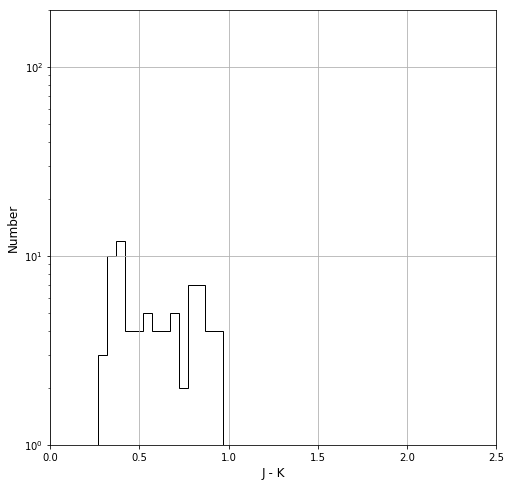

In [39]:
# 39

#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
#plt.xlim(-0.5, 4.0)
plt.xlim(0.0, 2.5)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=14.25, linewidth=1.5, color='red') # TRGB?
plt.axhline(y=14.0, linewidth=1.5, color='red') # TRGB?
#plt.axvline(x=0.0, linewidth=1.5, color='red') # left inflection point estimate
#plt.axvline(x=2.5, linewidth=1.5, color='red') # right inflection point estimate
#
plt.grid(True)
plt.show()
plt.close()

# J-K
# histogram (where phot_data.Kmag = 14.25 to 14.00)
#
# Plus with a narrower binwidth of 0.05.
#
jMINUSkHIST12 = phot_data[(phot_data.Kmag < 14.25) & (phot_data.Kmag > 14.00)]
#
#print jMINUSkHIST.Kmag
#print jMINUSkHIST.jMINUSk
#
binwidth = 0.05
bin_number = (max(jMINUSkHIST12.jMINUSk)+binwidth)/binwidth
# print bin_number
# bw = stats.knuth_bin_width(star_cat[phot_data.Kmag])
# print bw
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST12.jMINUSk, bins=np.arange(min(jMINUSkHIST12.jMINUSk), max(jMINUSkHIST12.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
#plt.xlim(-0.5, 4.0)
plt.xlim(0.0, 2.5)
plt.ylim(0.0, 200.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

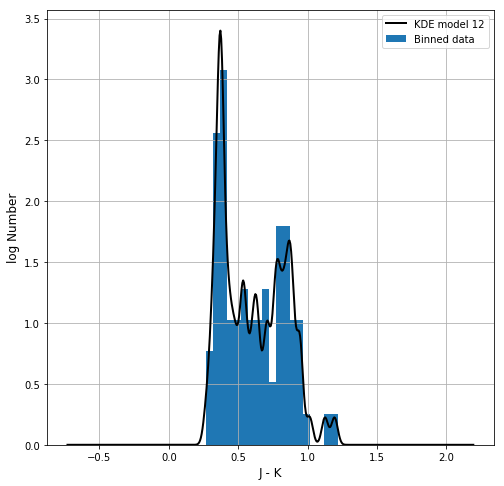

In [40]:
# 40

# Here's the conglomerated series of commands that Owen used to make a
# curve to fit the histogram(s).

kde_data_12 = jMINUSkHIST12.jMINUSk[(jMINUSkHIST12.jMINUSk > -10000) & (jMINUSkHIST12.jMINUSk < 3.0)].values

# ^ This defines the range of data to be used for the Kernel Density Estimation (KDE).
# "kde_data" will be appended with "_#" for successive y-value bin ranges.

bins=np.arange(min(kde_data_12 ), max(kde_data_12 ) + 0.05, 0.05)

# ^ This defines the bins over which the KDE will be plotted.

x_eval_12 = np.linspace(kde_data_12.min() - 1.0, kde_data_12.max() + 1.0, 500)

# ^ This evaluates the x-values of the histogram(?), with the KDE minimum and KDE maximum
# as arguments, though I don't fully understand the trailing "500" (or the +/- 1.0s).

kde_12 = gaussian_kde(kde_data_12,bw_method=0.1)
# kde_12 = gaussian_kde(kde_data_12)

# ^ This defines a KDE as a Gaussian to be evaluated over the range of data defined earlier,
# with binwidths of 0.1, very similarly to the third command from the top.

plt.figure(figsize=(8,8))
plt.plot(x_eval_12, kde_12(x_eval_12),'k',lw=2,label='KDE model 12')
plt.hist(kde_data_12,bins=bins,normed=True,label='Binned data')
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()

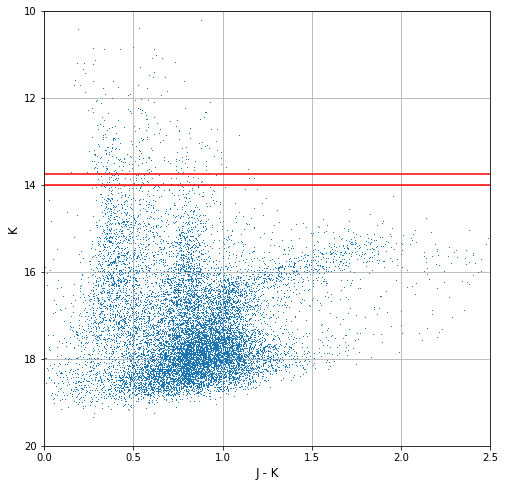

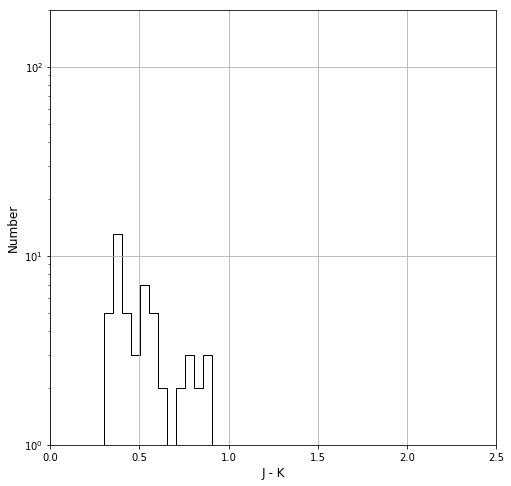

In [41]:
# 41

#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
#plt.xlim(-0.5, 4.0)
plt.xlim(0.0, 2.5)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=14.0, linewidth=1.5, color='red') # TRGB?
plt.axhline(y=13.75, linewidth=1.5, color='red') # TRGB?
#plt.axvline(x=0.0, linewidth=1.5, color='red') # left inflection point estimate
#plt.axvline(x=2.5, linewidth=1.5, color='red') # right inflection point estimate
#
plt.grid(True)
plt.show()
plt.close()

# J-K
# histogram (where phot_data.Kmag = 14.00 to 13.75)
#
# Plus with a narrower binwidth of 0.05.
#
jMINUSkHIST13 = phot_data[(phot_data.Kmag < 14.00) & (phot_data.Kmag > 13.75)]
#
#print jMINUSkHIST.Kmag
#print jMINUSkHIST.jMINUSk
#
binwidth = 0.05
bin_number = (max(jMINUSkHIST13.jMINUSk)+binwidth)/binwidth
# print bin_number
# bw = stats.knuth_bin_width(star_cat[phot_data.Kmag])
# print bw
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST13.jMINUSk, bins=np.arange(min(jMINUSkHIST13.jMINUSk), max(jMINUSkHIST13.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
#plt.xlim(-0.5, 4.0)
plt.xlim(0.0, 2.5)
plt.ylim(0.0, 200.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

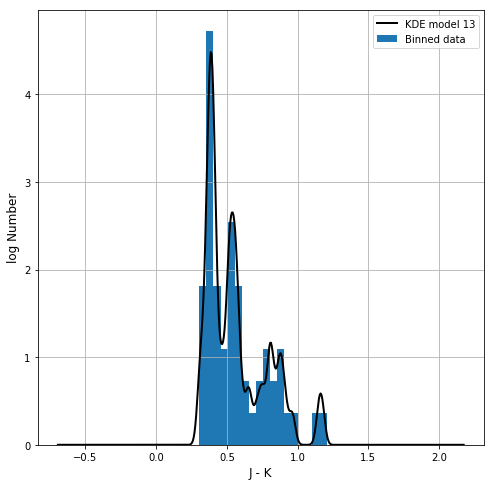

In [42]:
# 42

# Here's the conglomerated series of commands that Owen used to make a
# curve to fit the histogram(s).

kde_data_13 = jMINUSkHIST13.jMINUSk[(jMINUSkHIST13.jMINUSk > -10000) & (jMINUSkHIST13.jMINUSk < 3.0)].values

# ^ This defines the range of data to be used for the Kernel Density Estimation (KDE).
# "kde_data" will be appended with "_#" for successive y-value bin ranges.

bins=np.arange(min(kde_data_13 ), max(kde_data_13 ) + 0.05, 0.05)

# ^ This defines the bins over which the KDE will be plotted.

x_eval_13 = np.linspace(kde_data_13.min() - 1.0, kde_data_13.max() + 1.0, 500)

# ^ This evaluates the x-values of the histogram(?), with the KDE minimum and KDE maximum
# as arguments, though I don't fully understand the trailing "500" (or the +/- 1.0s).

kde_13 = gaussian_kde(kde_data_13,bw_method=0.1)
# kde_13 = gaussian_kde(kde_data_13)

# ^ This defines a KDE as a Gaussian to be evaluated over the range of data defined earlier,
# with binwidths of 0.1, very similarly to the third command from the top.

plt.figure(figsize=(8,8))
plt.plot(x_eval_13, kde_13(x_eval_13),'k',lw=2,label='KDE model 13')
plt.hist(kde_data_13,bins=bins,normed=True,label='Binned data')
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()

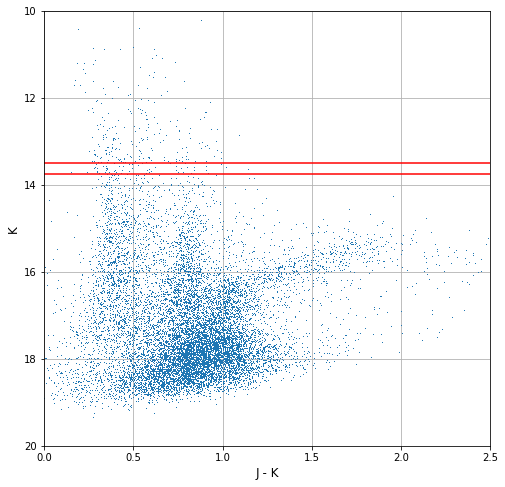

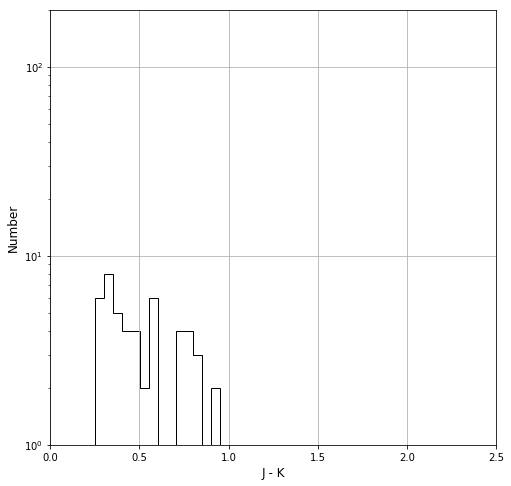

In [43]:
# 43

#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
#plt.xlim(-0.5, 4.0)
plt.xlim(0.0, 2.5)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=13.75, linewidth=1.5, color='red') # TRGB?
plt.axhline(y=13.5, linewidth=1.5, color='red') # TRGB?
#plt.axvline(x=0.0, linewidth=1.5, color='red') # left inflection point estimate
#plt.axvline(x=2.5, linewidth=1.5, color='red') # right inflection point estimate
#
plt.grid(True)
plt.show()
plt.close()

# J-K
# histogram (where phot_data.Kmag = 13.75 to 13.50)
#
# Plus with a narrower binwidth of 0.05.
#
jMINUSkHIST14 = phot_data[(phot_data.Kmag < 13.75) & (phot_data.Kmag > 13.50)]
#
#print jMINUSkHIST.Kmag
#print jMINUSkHIST.jMINUSk
#
binwidth = 0.05
bin_number = (max(jMINUSkHIST14.jMINUSk)+binwidth)/binwidth
# print bin_number
# bw = stats.knuth_bin_width(star_cat[phot_data.Kmag])
# print bw
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST14.jMINUSk, bins=np.arange(min(jMINUSkHIST14.jMINUSk), max(jMINUSkHIST14.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
#plt.xlim(-0.5, 4.0)
plt.xlim(0.0, 2.5)
plt.ylim(0.0, 200.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

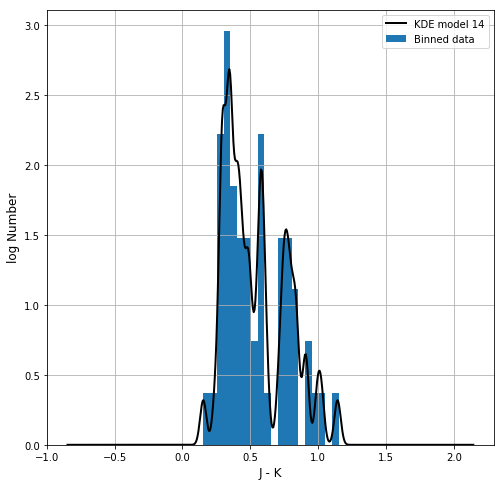

In [44]:
# 44

# Here's the conglomerated series of commands that Owen used to make a
# curve to fit the histogram(s).

kde_data_14 = jMINUSkHIST14.jMINUSk[(jMINUSkHIST14.jMINUSk > -10000) & (jMINUSkHIST14.jMINUSk < 3.0)].values

# ^ This defines the range of data to be used for the Kernel Density Estimation (KDE).
# "kde_data" will be appended with "_#" for successive y-value bin ranges.

bins=np.arange(min(kde_data_14 ), max(kde_data_14 ) + 0.05, 0.05)

# ^ This defines the bins over which the KDE will be plotted.

x_eval_14 = np.linspace(kde_data_14.min() - 1.0, kde_data_14.max() + 1.0, 500)

# ^ This evaluates the x-values of the histogram(?), with the KDE minimum and KDE maximum
# as arguments, though I don't fully understand the trailing "500" (or the +/- 1.0s).

kde_14 = gaussian_kde(kde_data_14,bw_method=0.1)
# kde_14 = gaussian_kde(kde_data_14)

# ^ This defines a KDE as a Gaussian to be evaluated over the range of data defined earlier,
# with binwidths of 0.1, very similarly to the third command from the top.

plt.figure(figsize=(8,8))
plt.plot(x_eval_14, kde_14(x_eval_14),'k',lw=2,label='KDE model 14')
plt.hist(kde_data_14,bins=bins,normed=True,label='Binned data')
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()

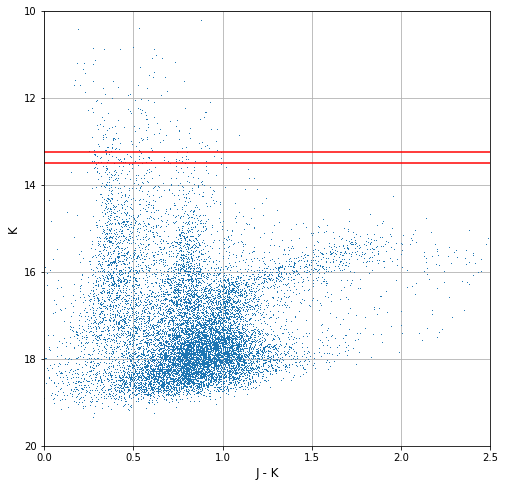

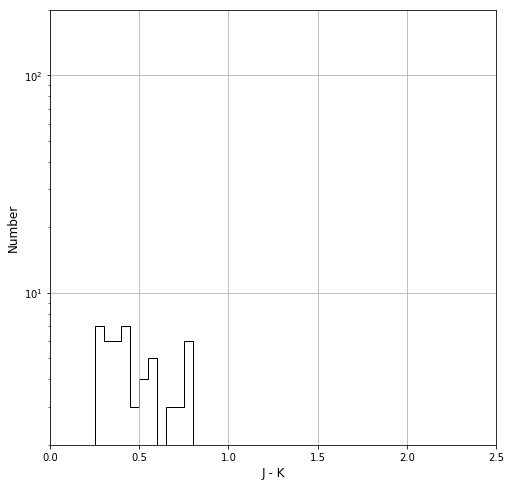

In [45]:
# 45

#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
#plt.xlim(-0.5, 4.0)
plt.xlim(0.0, 2.5)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=13.5, linewidth=1.5, color='red') # TRGB?
plt.axhline(y=13.25, linewidth=1.5, color='red') # TRGB?
#plt.axvline(x=0.0, linewidth=1.5, color='red') # left inflection point estimate
#plt.axvline(x=2.5, linewidth=1.5, color='red') # right inflection point estimate
#
plt.grid(True)
plt.show()
plt.close()

# J-K
# histogram (where phot_data.Kmag = 13.50 to 13.25)
#
# Plus with a narrower binwidth of 0.05.
#
jMINUSkHIST15 = phot_data[(phot_data.Kmag < 13.50) & (phot_data.Kmag > 13.25)]
#
#print jMINUSkHIST.Kmag
#print jMINUSkHIST.jMINUSk
#
binwidth = 0.05
bin_number = (max(jMINUSkHIST15.jMINUSk)+binwidth)/binwidth
# print bin_number
# bw = stats.knuth_bin_width(star_cat[phot_data.Kmag])
# print bw
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST15.jMINUSk, bins=np.arange(min(jMINUSkHIST15.jMINUSk), max(jMINUSkHIST15.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
#plt.xlim(-0.5, 4.0)
plt.xlim(0.0, 2.5)
plt.ylim(0.0, 200.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

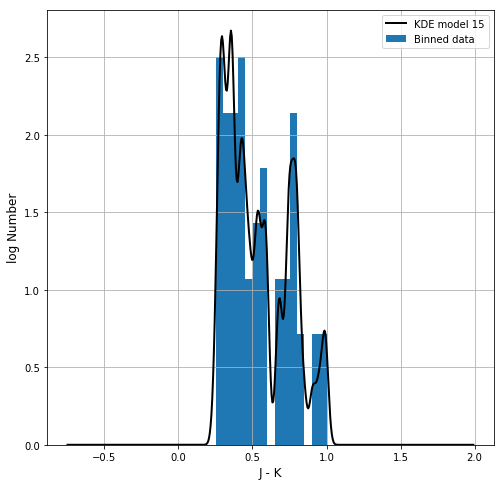

In [46]:
# 46

# Here's the conglomerated series of commands that Owen used to make a
# curve to fit the histogram(s).

kde_data_15 = jMINUSkHIST15.jMINUSk[(jMINUSkHIST15.jMINUSk > -10000) & (jMINUSkHIST15.jMINUSk < 3.0)].values

# ^ This defines the range of data to be used for the Kernel Density Estimation (KDE).
# "kde_data" will be appended with "_#" for successive y-value bin ranges.

bins=np.arange(min(kde_data_15 ), max(kde_data_15 ) + 0.05, 0.05)

# ^ This defines the bins over which the KDE will be plotted.

x_eval_15 = np.linspace(kde_data_15.min() - 1.0, kde_data_15.max() + 1.0, 500)

# ^ This evaluates the x-values of the histogram(?), with the KDE minimum and KDE maximum
# as arguments, though I don't fully understand the trailing "500" (or the +/- 1.0s).

kde_15 = gaussian_kde(kde_data_15,bw_method=0.1)
# kde_15 = gaussian_kde(kde_data_15)

# ^ This defines a KDE as a Gaussian to be evaluated over the range of data defined earlier,
# with binwidths of 0.1, very similarly to the third command from the top.

plt.figure(figsize=(8,8))
plt.plot(x_eval_15, kde_15(x_eval_15),'k',lw=2,label='KDE model 15')
plt.hist(kde_data_15,bins=bins,normed=True,label='Binned data')
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()

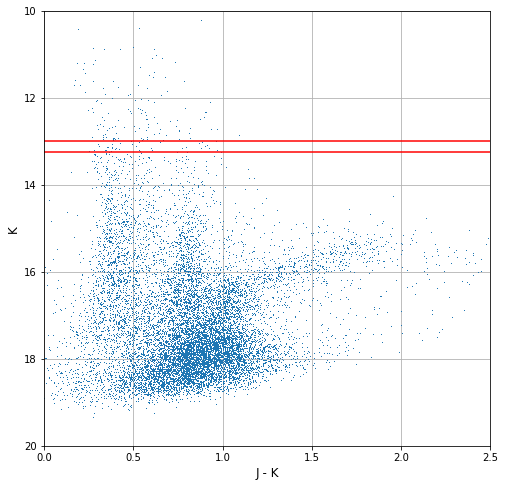

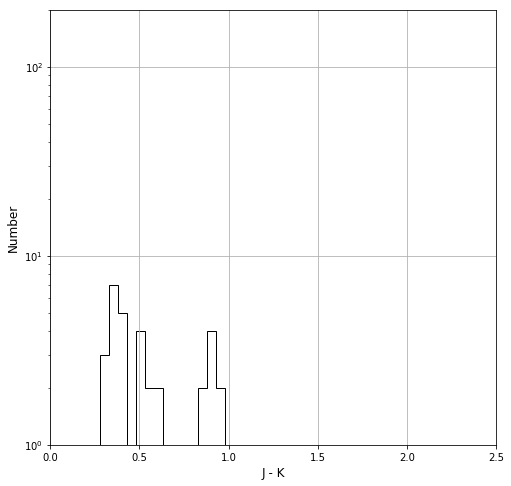

In [47]:
# 47

#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
#plt.xlim(-0.5, 4.0)
plt.xlim(0.0, 2.5)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=13.25, linewidth=1.5, color='red') # TRGB?
plt.axhline(y=13.0, linewidth=1.5, color='red') # TRGB?
#plt.axvline(x=0.0, linewidth=1.5, color='red') # left inflection point estimate
#plt.axvline(x=2.5, linewidth=1.5, color='red') # right inflection point estimate
#
plt.grid(True)
plt.show()
plt.close()

# J-K
# histogram (where phot_data.Kmag = 13.25 to 13.00)
#
# Plus with a narrower binwidth of 0.05.
#
jMINUSkHIST16 = phot_data[(phot_data.Kmag < 13.25) & (phot_data.Kmag > 13.00)]
#
#print jMINUSkHIST.Kmag
#print jMINUSkHIST.jMINUSk
#
binwidth = 0.05
bin_number = (max(jMINUSkHIST16.jMINUSk)+binwidth)/binwidth
# print bin_number
# bw = stats.knuth_bin_width(star_cat[phot_data.Kmag])
# print bw
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST16.jMINUSk, bins=np.arange(min(jMINUSkHIST16.jMINUSk), max(jMINUSkHIST16.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
#plt.xlim(-0.5, 4.0)
plt.xlim(0.0, 2.5)
plt.ylim(0.0, 200.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

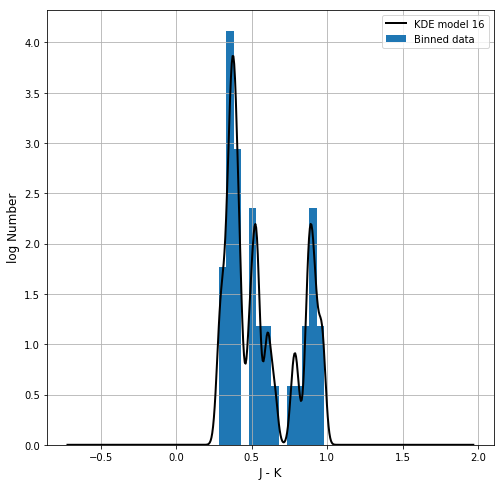

In [48]:
# 48

# Here's the conglomerated series of commands that Owen used to make a
# curve to fit the histogram(s).

kde_data_16 = jMINUSkHIST16.jMINUSk[(jMINUSkHIST16.jMINUSk > -10000) & (jMINUSkHIST16.jMINUSk < 3.0)].values

# ^ This defines the range of data to be used for the Kernel Density Estimation (KDE).
# "kde_data" will be appended with "_#" for successive y-value bin ranges.

bins=np.arange(min(kde_data_16 ), max(kde_data_16 ) + 0.05, 0.05)

# ^ This defines the bins over which the KDE will be plotted.

x_eval_16 = np.linspace(kde_data_16.min() - 1.0, kde_data_16.max() + 1.0, 500)

# ^ This evaluates the x-values of the histogram(?), with the KDE minimum and KDE maximum
# as arguments, though I don't fully understand the trailing "500" (or the +/- 1.0s).

kde_16 = gaussian_kde(kde_data_16,bw_method=0.1)
# kde_16 = gaussian_kde(kde_data_16)

# ^ This defines a KDE as a Gaussian to be evaluated over the range of data defined earlier,
# with binwidths of 0.1, very similarly to the third command from the top.

plt.figure(figsize=(8,8))
plt.plot(x_eval_16, kde_16(x_eval_16),'k',lw=2,label='KDE model 16')
plt.hist(kde_data_16,bins=bins,normed=True,label='Binned data')
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()